# Translating Between R and Python
> Leveraging the underlying principles to understand code implementation

Let's look at an example of some of the ways that we can leverage the underlying principles of Python, pandas, and numpy for easier implementation of data analysis tasks.

In [ ]:
#importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Example 1: Data Analysis
We have the following data summarizing the sports performances of a few players.  We want to perform some analysis to understand how the players are playing.
## Jump right in
First, we'll generate the data and take a look at it.

In [ ]:
sports_df = pd.DataFrame({'player_name': ['Johnson', 'James', 'Aniston', 'Errol', 'Caine', 'Jamison'],
                          'team': ['Tigers', 'Tigers', 'Lions', 'Lions', 'Lions', 'Bears'],
                          'game_1': [12.2, 3.3, 32.5, 10.4, 8.45, 5.45],
                          'game_2': [34, 45, 23, 13, 8, 24],
                          'game_3': [14, 23, 76, 19, 26, 53]})
sports_df.head()

,player_name,team,game_1,game_2,game_3
0,Johnson,Tigers,12.20,34,14
1,James,Tigers,3.30,45,23
2,Aniston,Lions,32.50,23,76
3,Errol,Lions,10.40,13,19
4,Caine,Lions,8.45,8,26


### Calculate the mean points per game

In [ ]:
sports_df.mean(numeric_only=True)

game_1    12.050000
game_2    24.500000
game_3    35.166667
dtype: float64

### Calculate the mean points per player and mutate a new column with these values

In [ ]:
sports_df.mean(axis=1, numeric_only=True)

0    20.066667
1    23.766667
2    43.833333
3    14.133333
4    14.150000
5    27.483333
dtype: float64

Now that we see that this works, let's mutate on the new column...

In [ ]:
#copy the underlying dataframe for simplicity
mutated_df = sports_df.copy()

#mutate the column
mutated_df['player_means'] = mutated_df.mean(axis=1, numeric_only=True)
mutated_df.head()

,player_name,team,game_1,game_2,game_3,player_means
0,Johnson,Tigers,12.20,34,14,20.066667
1,James,Tigers,3.30,45,23,23.766667
2,Aniston,Lions,32.50,23,76,43.833333
3,Errol,Lions,10.40,13,19,14.133333
4,Caine,Lions,8.45,8,26,14.150000


### Plot the overall game distributions

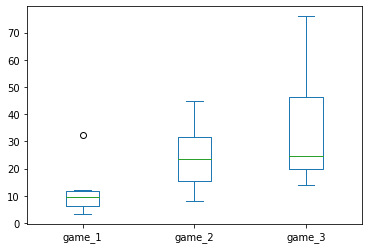

In [ ]:
sports_df[['game_1', 'game_2', 'game_3']].plot(kind='box');

This is SUPER simple as an analysis of this format.
## An alternate strategy
Let's see how this would look had the data looked a bit different when we got it.

In [ ]:
sports_df_tidy = sports_df.melt(id_vars = ['player_name', 'team'], var_name='game_id', value_name = 'points_scored')
sports_df_tidy.head(10)

,player_name,team,game_id,points_scored
0,Johnson,Tigers,game_1,12.20
1,James,Tigers,game_1,3.30
2,Aniston,Lions,game_1,32.50
3,Errol,Lions,game_1,10.40
4,Caine,Lions,game_1,8.45
5,Jamison,Bears,game_1,5.45
6,Johnson,Tigers,game_2,34.00
7,James,Tigers,game_2,45.00
8,Aniston,Lions,game_2,23.00
9,Errol,Lions,game_2,13.00


### Mean points per game
Now, it gets a litle harder, but not terrible.  Let's check, and we expect the process will look pretty similar to `dplyr` functionality.

In [ ]:
sports_df_tidy.groupby('game_id').mean()

,points_scored
game_id,
game_1,12.050000
game_2,24.500000
game_3,35.166667


### New column of mean points per player

In [ ]:
#copy for simplicity
mutate_df_tidy = sports_df_tidy.copy()

#mutate another column
mutate_df_tidy['player_means'] = mutate_df_tidy.groupby(['player_name', 'team'])['points_scored'].transform(lambda x: x.mean())
mutate_df_tidy.sort_values('player_name')

,player_name,team,game_id,points_scored,player_means
8,Aniston,Lions,game_2,23.00,43.833333
2,Aniston,Lions,game_1,32.50,43.833333
14,Aniston,Lions,game_3,76.00,43.833333
4,Caine,Lions,game_1,8.45,14.150000
16,Caine,Lions,game_3,26.00,14.150000
10,Caine,Lions,game_2,8.00,14.150000
3,Errol,Lions,game_1,10.40,14.133333
15,Errol,Lions,game_3,19.00,14.133333
9,Errol,Lions,game_2,13.00,14.133333
1,James,Tigers,game_1,3.30,23.766667


Mutating new columns based on a groupby tends to be a more unpleasant task (in my opinion) with long data in pandas.  For this reason, I often prefer wide data in Python if possible.  However, the next section defines why I tend to switch to long data if I have complex plots to create.

### Plot distribution of points scored per game
This is a little hard without switching to another package.  I'll switch to seaborn here which is more conducive to plotting different forms of data.  Let's try it here with a more program-y approach...

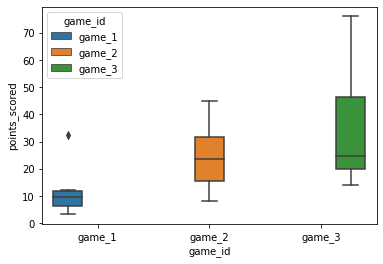

In [ ]:
sns.boxplot(x=sports_df_tidy['game_id'], y=sports_df_tidy['points_scored'], hue=sports_df_tidy['game_id']);

The below approach is more reminiscent of ggplot. I use this more if I ever MUST use long data.

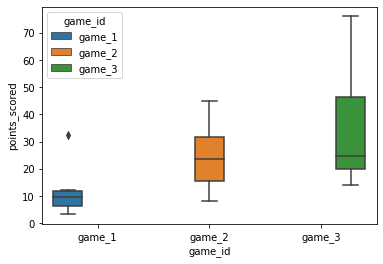

In [ ]:
sns.boxplot(data = sports_df_tidy, x='game_id', y='points_scored', hue='game_id');